# Itertools Tutorial

Before we dive into the functions available in itertools, it would be helpful to examine its purpose. According to the [docs](https://docs.python.org/3/library/itertools.html), itertools is a collection of "fast, memory efficient tools" for dealing with iterable objects! Let's take a quick look at what code looks like before and after implementing itertools:

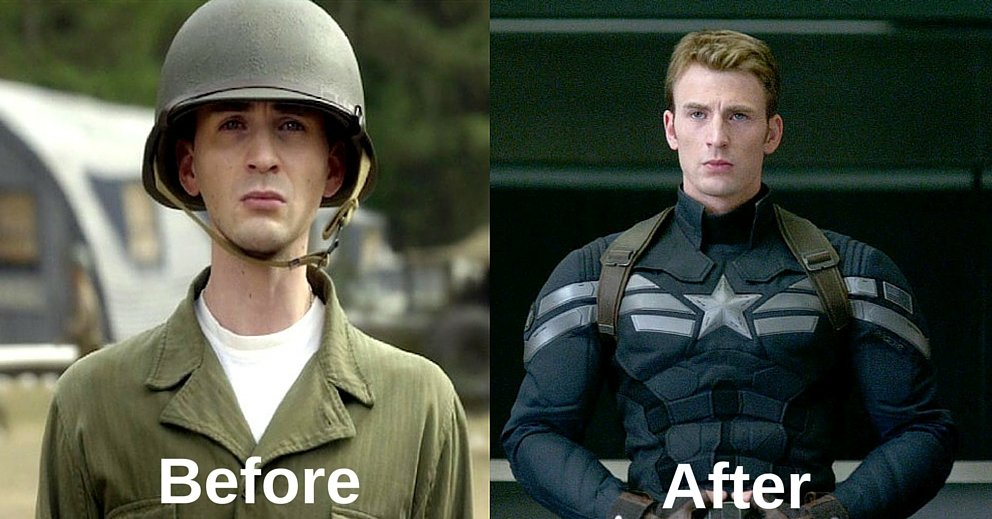

# Getting Started

This tutorial will cover a number of functions within itertools, so we should start by importing the package and initiating some arrays to demo the tools.

In [6]:
import itertools
import numpy as np

In [70]:
a = np.array(np.arange(20))
b = np.array(['Bruce', 'Clark', 'Jon', 'Steve', 'Tony', 'Peter', 'Chris'])
c = np.array(['a','b','c','d','e','f'])

Itertools creates iterables that save memory by only computing values when called upon. If I were to call a function like **.islice()**, which simply returns a slice of a given iterable, it would return the following object:

In [16]:
itertools.islice(b,3)

This is helpful for saving memory, but for this demonstration, I want to see the results of the itertools function - how can this be done? A simple way to observe the results is by including an asterisk (\*) before the iterable when printing! (Note that the \* unpacks the iterable on one line)

In [17]:
print(*itertools.islice(b,3))

Bruce Clark Jon


The * comes in handy because it tells the print statement to work on each value computed by the iterable. Another less efficient way to perform the task above is to use a for loop like so:

In [18]:
for i in itertools.islice(b,3):
    print(i)

Bruce
Clark
Jon


Great, so I can slice an iterable and save some memory in the process ¯\\\_(ツ)_/¯. Can I do something interesting with itertools?

# On to Functions!

Let's say I'm helping my friend evaluate how much of his mortgage will remain after 5 years of payments, but am too tired to calculate the result by hand. I have a list of values and a function that I want to apply to said values, which in this case is the amortization of a mortgage with annual payments. Can itertools come to the rescue?

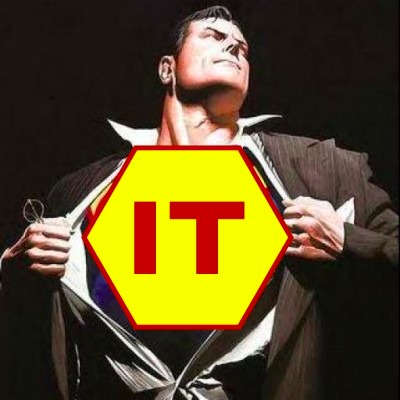

## Accumulate

In this case, we can use the **.accumulate()** function, which iterates through the iterable applying the provided function to two values at a time.

In [38]:
cashflows = np.array([400000, -20000, -21000, -21000, -24000, -30000])
interest = .04

amor_eq = lambda mort, pmt: mort*(1+interest) + pmt

print(*itertools.accumulate(cashflows, amor_eq))

400000 396000.0 390840.0 385473.6 376892.544 361968.24576


As a default, **.accumulate()** sums the values provided. This may provide better intuition as to what is happening.

In [46]:
print(a,'\n')
print(*itertools.accumulate(a))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 

0 1 3 6 10 15 21 28 36 45 55 66 78 91 105 120 136 153 171 190


If I only want to see the final result, I can just call **.reduce()**.

## Chain

If I want to quickly combine two objects on which I will perform some operations, I can always chain those objects together to form a new iterable that saves memory via the creation of a combined iterable object.

In [50]:
print(*itertools.chain(a,c))

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 a b c d e f


That's a fine operation, but why would I not just use **.append()**?

In [66]:
list(np.arange(1000000)).append(list(np.arange(3000000,3)))

In [67]:
itertools.chain(np.arange(1000000),np.arange(3000000,step=3))

Both cells above perform the same operation, but look at the execution time for each. The itertools chain is **10x** faster! For small iterables, the difference in performance may not be significant, but as objects grow in size, itertools becomes more valuable.

## Zip_Longest

Now, let's say I have two objects that I want to zip together because the values in each are associated with one another. Unfortunately, they have different lengths. What can be done? Why **.zip_longest()** of course!

Say I have a new list that provides the secret identities of the individuals listed in array b from earlier:

In [76]:
pub = np.array(['Batman', 'Superman', 'Martian Manhunter', 'Captain America', 'Ironman', 'Spiderman'])

Wonderful, except that one name does not seem to have a corresponding identity. In this case, **zip_longest()** just attaches None to the remaining valuess from the longer object.

In [77]:
print(*itertools.zip_longest(b, pub))

('Bruce', 'Batman') ('Clark', 'Superman') ('Jon', 'Martian Manhunter') ('Steve', 'Captain America') ('Tony', 'Ironman') ('Peter', 'Spiderman') ('Chris', None)


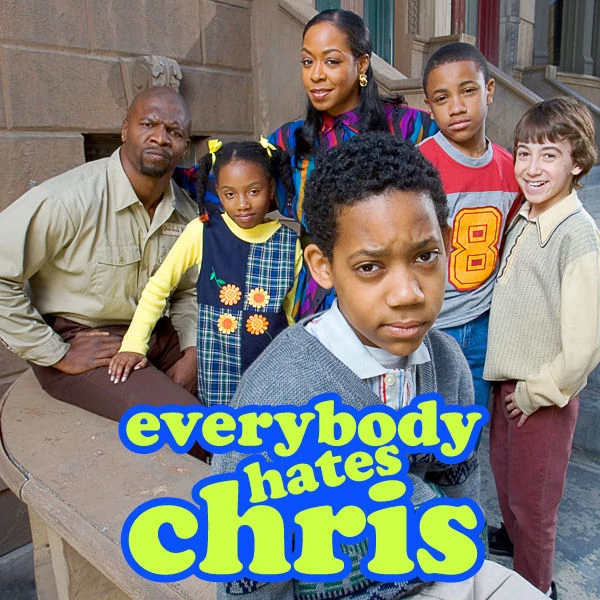

## FilterFalse

If I need to perform operations on odd numbers in a certain range without saving them in memory, I can use the **.filterfalse()** function, which returns the values for which a given function is false.

In [81]:
print(*itertools.filterfalse(lambda x: x%2 == 0,np.arange(100)))

1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 53 55 57 59 61 63 65 67 69 71 73 75 77 79 81 83 85 87 89 91 93 95 97 99


## Repeat

As I was working on a challenge to classify politicians as democrats or republicans, I needed to make a dummy model that simply predicted democrat for every individual, regardless of how they voted on certain measures. The accuracy of this model needed to be plotted along with teh accuracy of three other algorithims. It just so happens that this can be done using **.repeat()**!

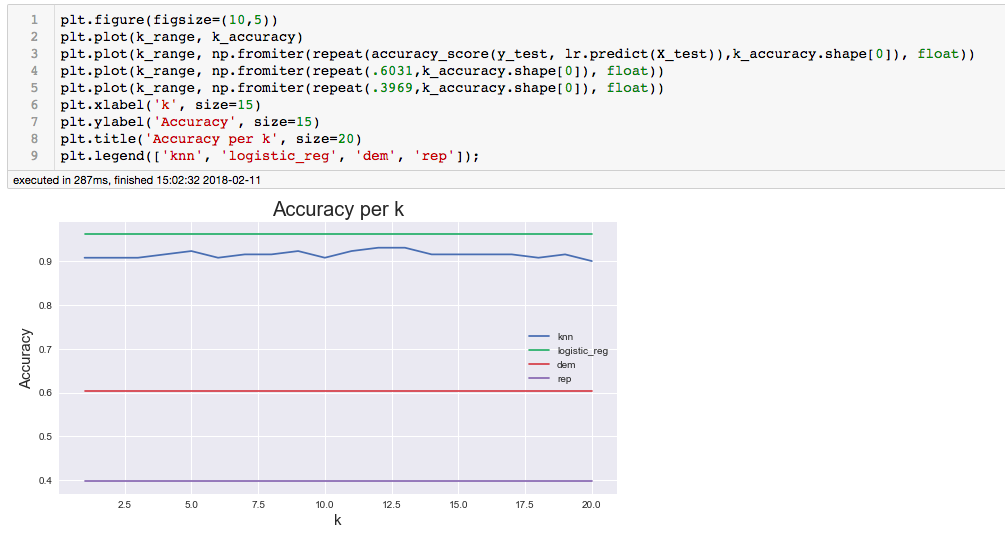

## Combinations & Permutations

Itertools has a neat set of functions that provides combinations and permutations for a given object. Remember that for combinations, order does not matter while for permutations, order matters. The **.combination()** function creates an iterable from a given object in groups of the second argument provided:

In [89]:
print(*itertools.combinations('1234', 2))

('1', '2') ('1', '3') ('1', '4') ('2', '3') ('2', '4') ('3', '4')


If you want elements to be repeated, simply use the **.combinations_with_replacement()** function!

In [90]:
print(*itertools.combinations_with_replacement('ABCD', 2))

('A', 'A') ('A', 'B') ('A', 'C') ('A', 'D') ('B', 'B') ('B', 'C') ('B', 'D') ('C', 'C') ('C', 'D') ('D', 'D')


Now, if I want to ignore order and return a list of permutations, I can use **.permutations()**.

In [91]:
print(*itertools.permutations('ABCD', 2))

('A', 'B') ('A', 'C') ('A', 'D') ('B', 'A') ('B', 'C') ('B', 'D') ('C', 'A') ('C', 'B') ('C', 'D') ('D', 'A') ('D', 'B') ('D', 'C')


## Cartesian Product

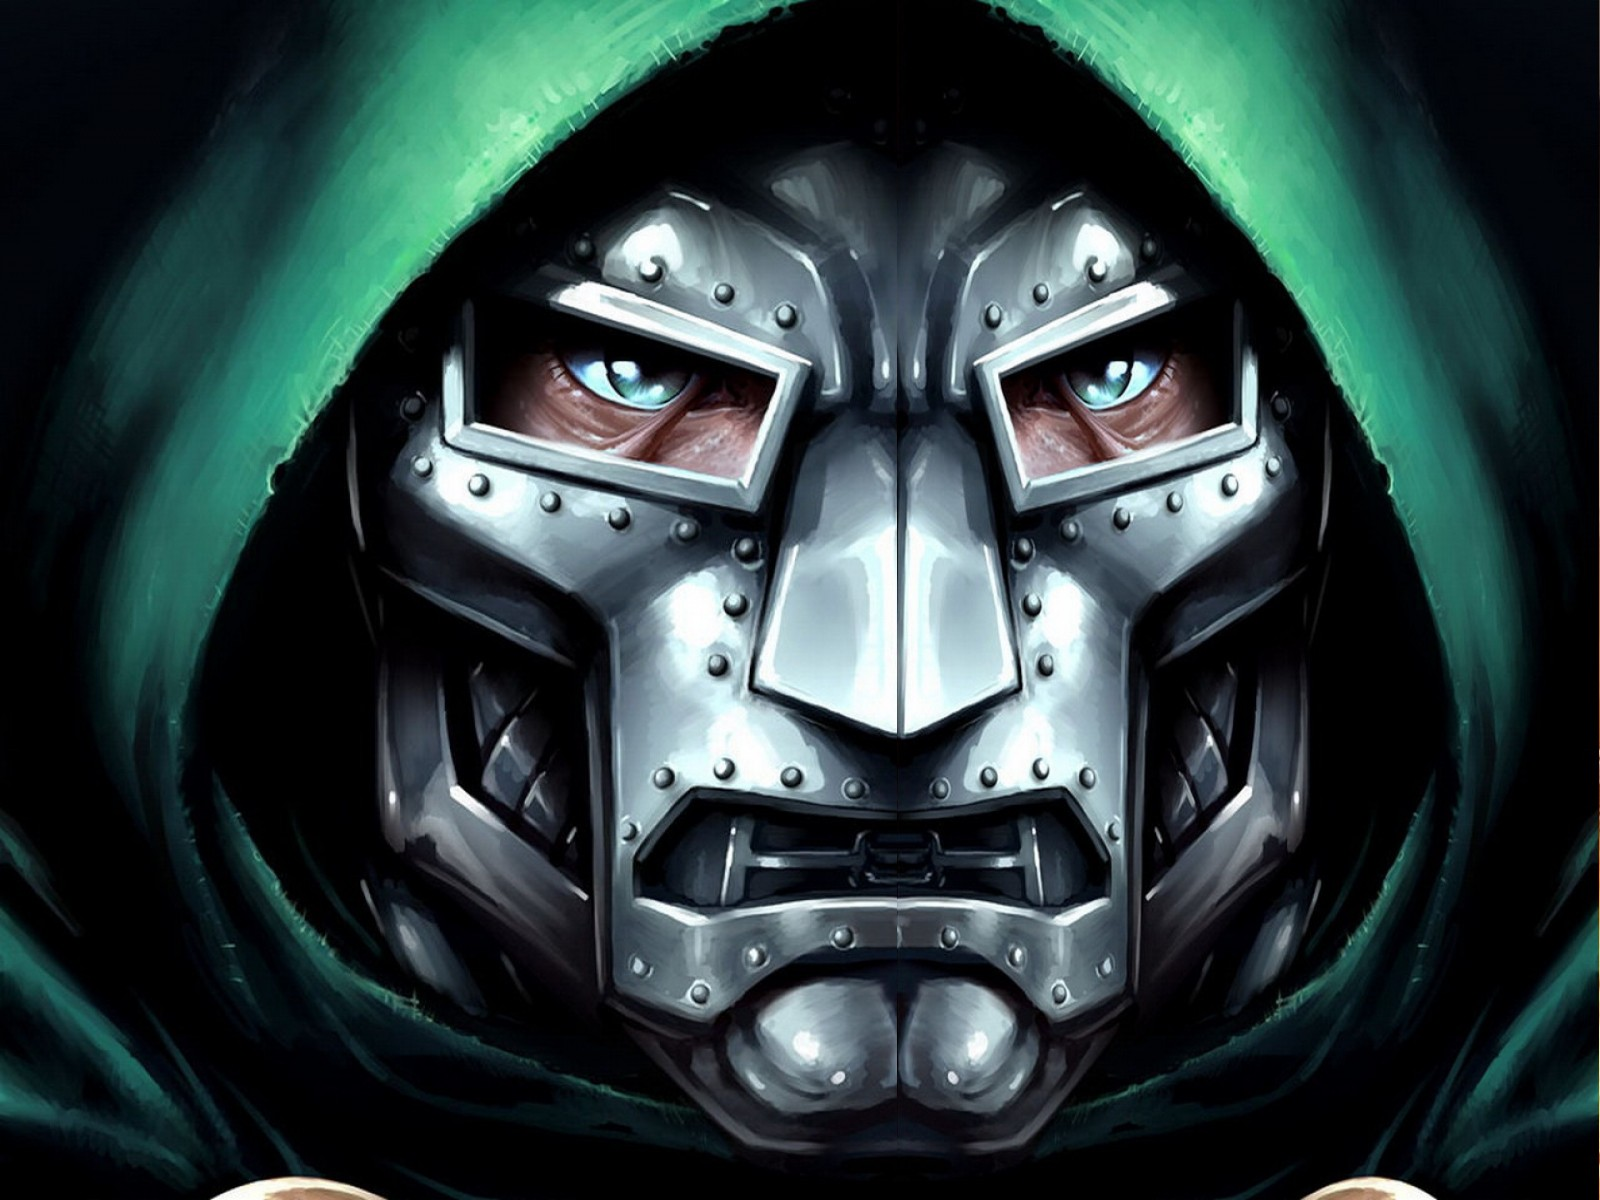

Uh oh, Dr. Doom has commandeered itertools in search of a cartesian coordinate system for the world in his efforts to launch an attack on strategic regions! His clunky metal fingers make it difficult to trace coordinates on a physical map, so he wants some python code to automatically output each pair. For this nefarious plot, he has chosen to use **.product()**!

In [122]:
coordinates = itertools.product(itertools.islice(a, 5),itertools.islice(c,3))

In [124]:
print(*itertools.zip_longest(['NYC', 'Tokyo', 'Chicago', 'London',\
                             'SF', 'Houston', 'Lisbon', 'Paris', 'Asgard'], coordinates))

('NYC', (0, 'a')) ('Tokyo', (0, 'b')) ('Chicago', (0, 'c')) ('London', (1, 'a')) ('SF', (1, 'b')) ('Houston', (1, 'c')) ('Lisbon', (2, 'a')) ('Paris', (2, 'b')) ('Asgard', (2, 'c')) (None, (3, 'a')) (None, (3, 'b')) (None, (3, 'c')) (None, (4, 'a')) (None, (4, 'b')) (None, (4, 'c'))


# Explore Itertools 

Itertools has additional functions, which you can explore using the docs. There are also some recommended recipes for expanding the toolset and deriving even more power from the package.